In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.Data Preparation

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split

#fetch dataset dataset
covertype = fetch_ucirepo(id=31)
X = covertype.data.features
y = covertype.data.targets

# metadata
print("\n dataset Overview:")
display(covertype.metadata)
print("\n Target distribution:")
print(y.value_counts())
print("\n features:")
print(X.info())





 dataset Overview:


{'uci_id': 31,
 'name': 'Covertype',
 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype',
 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv',
 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 581012,
 'num_features': 54,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['Cover_Type'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1998,
 'last_updated': 'Sat Mar 16 2024',
 'dataset_doi': '10.24432/C50K5N',
 'creators': ['Jock Blackard'],
 'intro_paper': None,
 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell


 Target distribution:
Cover_Type
2             283301
1             211840
3              35754
7              20510
6              17367
5               9493
4               2747
Name: count, dtype: int64

 features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm            

In [ ]:
# null ones
print("Null values in features:", X.isnull().sum().sum())

# duplicate
print("Duplicate rows:", X.duplicated().sum())

Null values in features: 0
Duplicate rows: 0


As you can see, there are no NULL values or duplicate records.

In [ ]:
from sklearn.preprocessing import StandardScaler


continuous_features = X.iloc[:, :10]
binary_features = X.iloc[:, 10:]


scaler = StandardScaler()
X_cont_scaled = pd.DataFrame(scaler.fit_transform(continuous_features), columns=continuous_features.columns)


X_processed = pd.concat([X_cont_scaled, binary_features.reset_index(drop=True)], axis=1)

Only the continuous numerical features (such as Elevation, Slope, Distance to Hydrology, and Hillshade) need to be normalized. Binary features like Soil Type and Wilderness Area do not require normalization.


In [ ]:
# Data splitting using train_test_split with stratification
#first split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_processed, y, test_size=0.10, random_state=42, stratify=y
)

#second split(done on privios one)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# distribution on each section
print("Train target distribution:\n", y_train.value_counts(normalize=True))
print("Validation target distribution:\n", y_val.value_counts(normalize=True))
print("Test target distribution:\n", y_test.value_counts(normalize=True))


Train target distribution:
 Cover_Type
2             0.487598
1             0.364606
3             0.061538
7             0.035301
6             0.029890
5             0.016339
4             0.004727
Name: proportion, dtype: float64
Validation target distribution:
 Cover_Type
2             0.487591
1             0.364600
3             0.061547
7             0.035317
6             0.029878
5             0.016316
4             0.004750
Name: proportion, dtype: float64
Test target distribution:
 Cover_Type
2             0.487625
1             0.364600
3             0.061513
7             0.035283
6             0.029913
5             0.016351
4             0.004716
Name: proportion, dtype: float64


In datasets like Covertype, where there is a significant class imbalance (i.e., some classes have many more samples than others), using the stratify parameter in train_test_split is essential.

The stratify=y parameter ensures that the proportion of each class is preserved across the train, validation, and test splits. This means each subset will have a class distribution similar to the original dataset.

❗ What happens if we don't use stratify?

    Uneven class distribution:
    Some classes may become overrepresented or underrepresented in the train/validation/test sets—or even be missing entirely.

    Poor model performance:
    The model might not learn to predict the minority classes correctly because it didn't see enough examples during training.

    Misleading evaluation:
    If the test or validation set lacks certain classes, the model might appear to perform well overall, while actually failing on the underrepresented classes.

2.Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(y_train, y_val, y_test):
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    sns.countplot(x=y_train, ax=ax[0])
    ax[0].set_title('Train Set Class Distribution')
    ax[0].set_xlabel('Cover Type')

    sns.countplot(x=y_val, ax=ax[1])
    ax[1].set_title('Validation Set Class Distribution')
    ax[1].set_xlabel('Cover Type')

    sns.countplot(x=y_test, ax=ax[2])
    ax[2].set_title('Test Set Class Distribution')
    ax[2].set_xlabel('Cover Type')

    plt.tight_layout()
    plt.show()


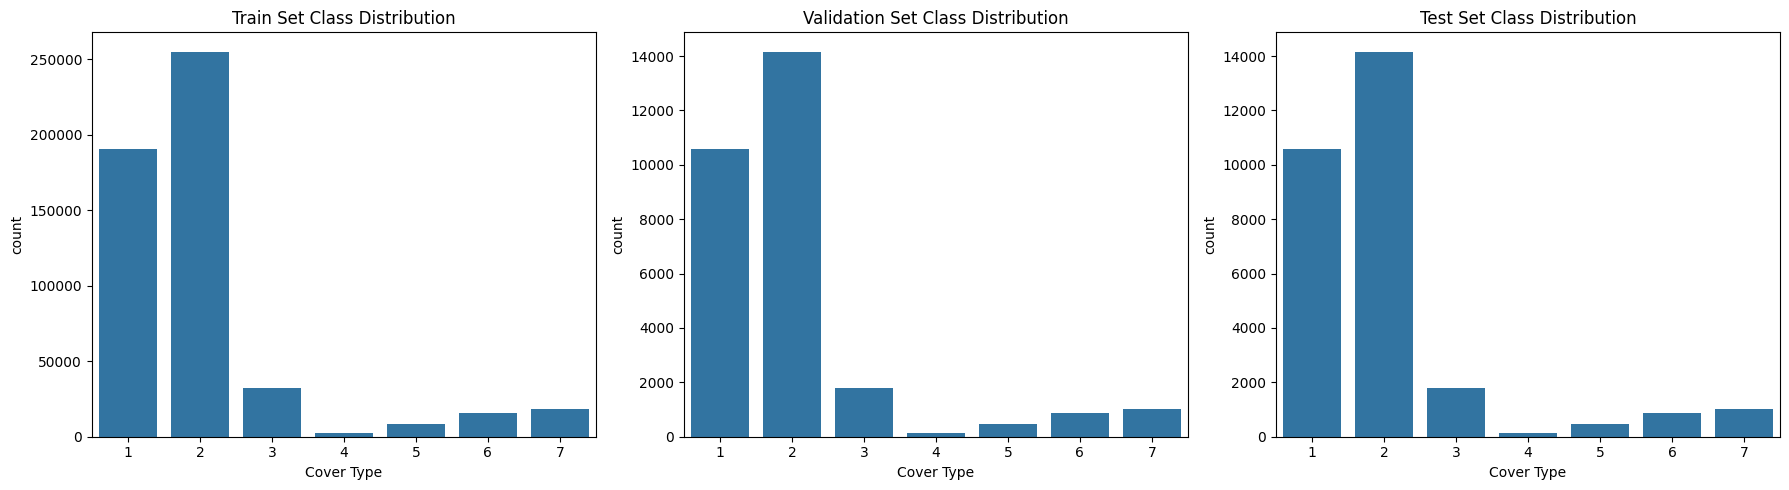

In [ ]:
# ebteda bayad dade hara az halate scalar be pandas.series tabdil konim
y_train = y_train['Cover_Type'] if isinstance(y_train, pd.DataFrame) else y_train
y_val = y_val['Cover_Type'] if isinstance(y_val, pd.DataFrame) else y_val
y_test = y_test['Cover_Type'] if isinstance(y_test, pd.DataFrame) else y_test

plot_class_distribution(y_train, y_val, y_test)


the number of samples for each class in the training, validation, and test sets using histograms

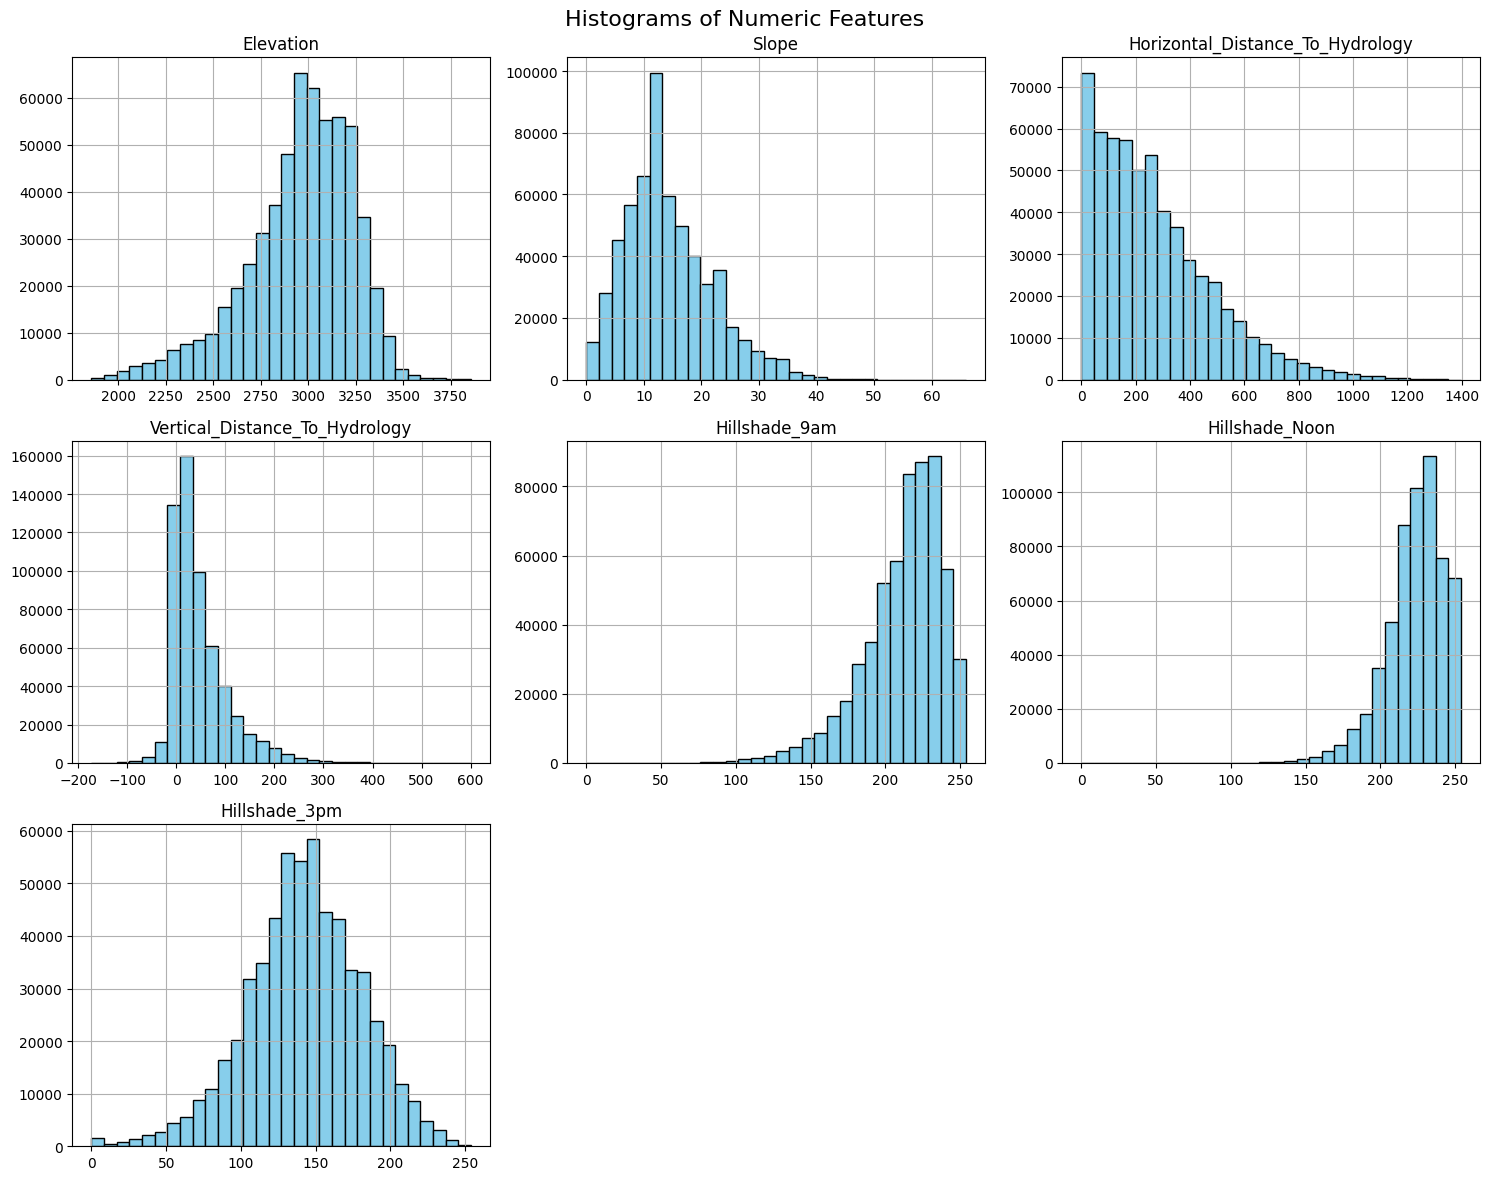

In [ ]:

numeric_features = ['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology', 'Hillshade_9am',
                    'Hillshade_Noon', 'Hillshade_3pm']

X[numeric_features].hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()


Distribution of features with histogram and barplot

In [ ]:


def plot_feature_distribution(X):

    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns


    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, 4 * len(numerical_features)))

    for i, feature in enumerate(numerical_features):
        #histogram
        sns.histplot(X[feature], kde=True, ax=axes[i, 0], color='skyblue')
        axes[i, 0].set_title(f'{feature} - Histogram')
        axes[i, 0].set_xlabel(feature)
        axes[i, 0].set_ylabel('Frequency')

        # barplot for distribution of each feature
        sns.barplot(x=X[feature].value_counts().index, y=X[feature].value_counts().values, ax=axes[i, 1], color='lightgreen')
        axes[i, 1].set_title(f'{feature} - Barplot')
        axes[i, 1].set_xlabel(feature)
        axes[i, 1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()


plot_feature_distribution(X)



3.Data prepration for Pytorch

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader


class CovertypeDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.to_numpy(), dtype=torch.float32)
        self.y = torch.tensor(y.to_numpy(), dtype=torch.long)  #multiclass

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


#   datasets
train_dataset = CovertypeDataset(X_train, y_train)
val_dataset   = CovertypeDataset(X_val, y_val)
test_dataset  = CovertypeDataset(X_test, y_test)

#dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)


4.Building Neural Network Model

In [ ]:

import torch.nn as nn
import torch.nn.functional as F

class NeuralModel(nn.Module):
    def __init__(self, input_dim=54, hidden_dims=[128, 64], output_dim=7, dropout=0.3):
        super(NeuralModel, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dims[0]),
            nn.BatchNorm1d(hidden_dims[0]),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.BatchNorm1d(hidden_dims[1]),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(hidden_dims[1], output_dim)
        )

    def forward(self, x):
        return self.layers(x)


5.CUDA implementation

In [ ]:
# %env CUDA_LAUNCH_BLOCKING=1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = NeuralModel().to(device)
# During training, the inputs and labels must also be moved to the same device as the model, for example:
# for batch in train_loader:
#     inputs, labels = batch
#     inputs = inputs.to(device)
#     labels = labels.to(device)

#you can see this in section 7

Using device: cuda


6.Defining the Optimizer and Regularization Techniques


In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

#adam optimizer with learning rate of 0.001 and weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # weight_decay = L2 regularization

#stepLR
#reducing learning rate every ten step by multiplying by 0.5
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)



In [ ]:

def train(model, dataloader, optimizer, loss_fn, device):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0
    # as been mentioned in section 5
    for inputs, labels in dataloader:
        inputs = inputs.to(device)

        #for crossentropy loss function labels should have these free attributes
        # Be of shape (N,) — where N is the batch size.→ Labels should be 1D, not one-hot encoded, and not shaped like (N, 1) or (N, num_classes).
        # Be of type torch.long→ The labels must be of integer type (dtype=torch.long), representing class indices.
        # Contain class indices in the range [0, num_classes - 1]→ For example, if you have 7 classes, valid label values should be integers from 0 to 6.

        labels=labels.view(-1).long().to(device) - 1

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy


def validate(model, dataloader, loss_fn, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels=labels.view(-1).long().to(device) - 1

            outputs = model(inputs)
            loss = loss_fn(outputs, labels)

            total_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy


In [ ]:
# %env CUDA_LAUNCH_BLOCKING=1

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
num_epochs=45
loss_fn = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, loss_fn, device)
    val_loss, val_acc = validate(model, val_loader, loss_fn, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    scheduler.step()


Epoch 1/45 | Train Loss: 0.5968 | Val Loss: 0.5000 | Train Acc: 0.7433 | Val Acc: 0.7836
Epoch 2/45 | Train Loss: 0.5516 | Val Loss: 0.4690 | Train Acc: 0.7623 | Val Acc: 0.8012
Epoch 3/45 | Train Loss: 0.5356 | Val Loss: 0.4557 | Train Acc: 0.7701 | Val Acc: 0.8062
Epoch 4/45 | Train Loss: 0.5246 | Val Loss: 0.4426 | Train Acc: 0.7758 | Val Acc: 0.8156
Epoch 5/45 | Train Loss: 0.5187 | Val Loss: 0.4349 | Train Acc: 0.7789 | Val Acc: 0.8191
Epoch 6/45 | Train Loss: 0.5127 | Val Loss: 0.4272 | Train Acc: 0.7808 | Val Acc: 0.8236
Epoch 7/45 | Train Loss: 0.5091 | Val Loss: 0.4216 | Train Acc: 0.7819 | Val Acc: 0.8265
Epoch 8/45 | Train Loss: 0.5065 | Val Loss: 0.4170 | Train Acc: 0.7841 | Val Acc: 0.8268
Epoch 9/45 | Train Loss: 0.5049 | Val Loss: 0.4162 | Train Acc: 0.7847 | Val Acc: 0.8290
Epoch 10/45 | Train Loss: 0.5025 | Val Loss: 0.4094 | Train Acc: 0.7863 | Val Acc: 0.8250
Epoch 11/45 | Train Loss: 0.4926 | Val Loss: 0.3987 | Train Acc: 0.7899 | Val Acc: 0.8346
Epoch 12/45 | Train

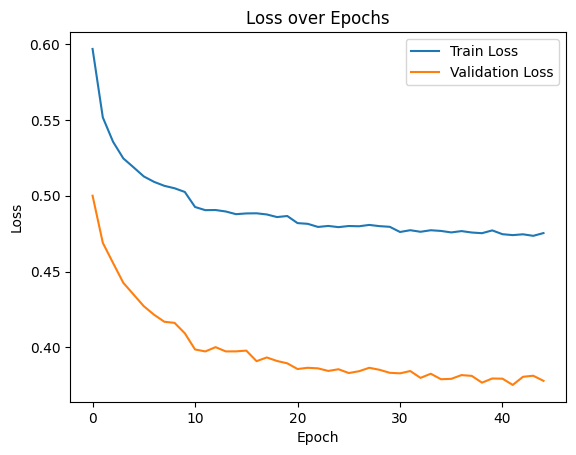

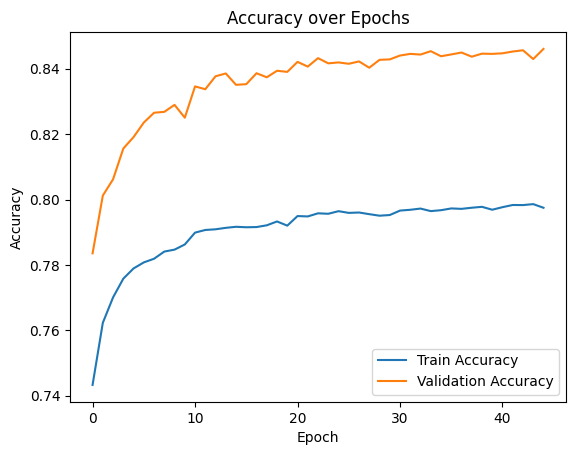

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()


7. Final Testing and Performance Reporting


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

def evaluate(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels=labels.view(-1).long().to(device) - 1


            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())


    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy, all_labels, all_preds


test_accuracy, test_labels, test_preds = evaluate(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 84.55%


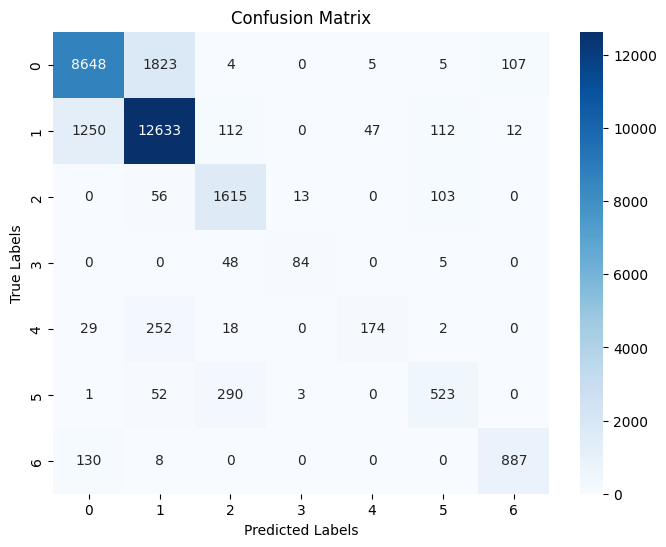

In [ ]:
# Confusion Matrix
def plot_confusion_matrix(labels, preds, num_classes):
    cm = confusion_matrix(labels, preds, labels=range(num_classes))

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


plot_confusion_matrix(test_labels, test_preds, num_classes=7)


We should pay attention to the main diagonal of the confusion matrix.  
The number of correctly predicted samples for each class, from highest to lowest, is:  
Class 0  
Class 1, 2, 6, 5, 4, 3  

However, we should focus on the proportions rather than the absolute counts, as shown below:


In [ ]:
import numpy as np

cm = confusion_matrix(test_labels, test_preds, labels=range(7))
num_classes = cm.shape[0]

print("Class-wise correct prediction ratios (Recall):")
for i in range(num_classes):
    total_samples_in_class = np.sum(cm[i])      # sum of row i: total true instances of class i
    correct_predictions = cm[i, i]              # The diagonal value: correctly predicted instances for class i
    recall = correct_predictions / total_samples_in_class if total_samples_in_class > 0 else 0.0
    print(f"Class {i}: {recall:.4f}")

Class-wise correct prediction ratios (Recall):
Class 0: 0.8165
Class 1: 0.8918
Class 2: 0.9037
Class 3: 0.6131
Class 4: 0.3663
Class 5: 0.6018
Class 6: 0.8654


This means that our model performs well in recognizing samples of classes 0, 1, 2, and 6, performs relatively poorly in recognizing samples of classes 3 and 5, and performs very poorly in recognizing samples of class 4.
